In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [49]:
#Importing the dataset
data = pd.read_csv("iris.csv", index_col=0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


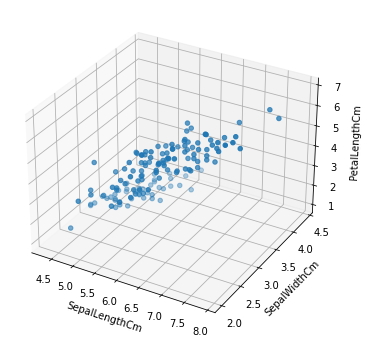

In [50]:
# 3d scatter plot of sepal length width and petal length
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

ax.scatter(data['SepalLengthCm'], data['SepalWidthCm'], data['PetalLengthCm'])

ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('PetalLengthCm')

plt.show()

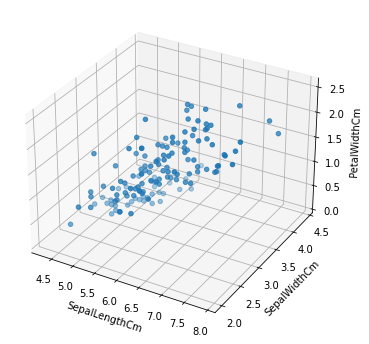

In [51]:
# 3d scatter plot of sepal length width and petal width
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

ax.scatter(data['SepalLengthCm'], data['SepalWidthCm'], data['PetalWidthCm'])

ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('PetalWidthCm')

plt.show()

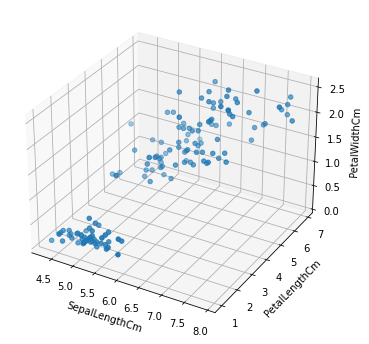

In [52]:
# 3d scatter plot of sepal length and petal length, width
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

ax.scatter(data['SepalLengthCm'], data['PetalLengthCm'], data['PetalWidthCm'])

ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('PetalLengthCm')
ax.set_zlabel('PetalWidthCm')

plt.show()

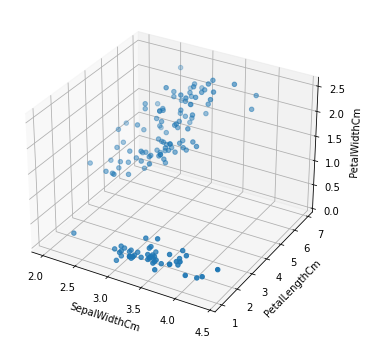

In [53]:
# 3d scatter plot of sepal width and petal length, width
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

ax.scatter(data['SepalWidthCm'], data['PetalLengthCm'], data['PetalWidthCm'])

ax.set_xlabel('SepalWidthCm')
ax.set_ylabel('PetalLengthCm')
ax.set_zlabel('PetalWidthCm')

plt.show()

In [54]:
# create a function that creates a heatmap showing correlation between columns
colormap = sns.diverging_palette(220, 10, as_cmap=True)

def corr_heatmap(df):
  # get correlations
  corrs = df.corr()

  # pick appropriate palette for heatmap

  # Plot figsize
  fig, ax = plt.subplots(figsize=(15, 15))

  # to mask mirrored side of heatmap
  dropSelf = np.zeros_like(corrs)
  dropSelf[np.triu_indices_from(dropSelf)] = True

  # Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
  ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

  plt.show()

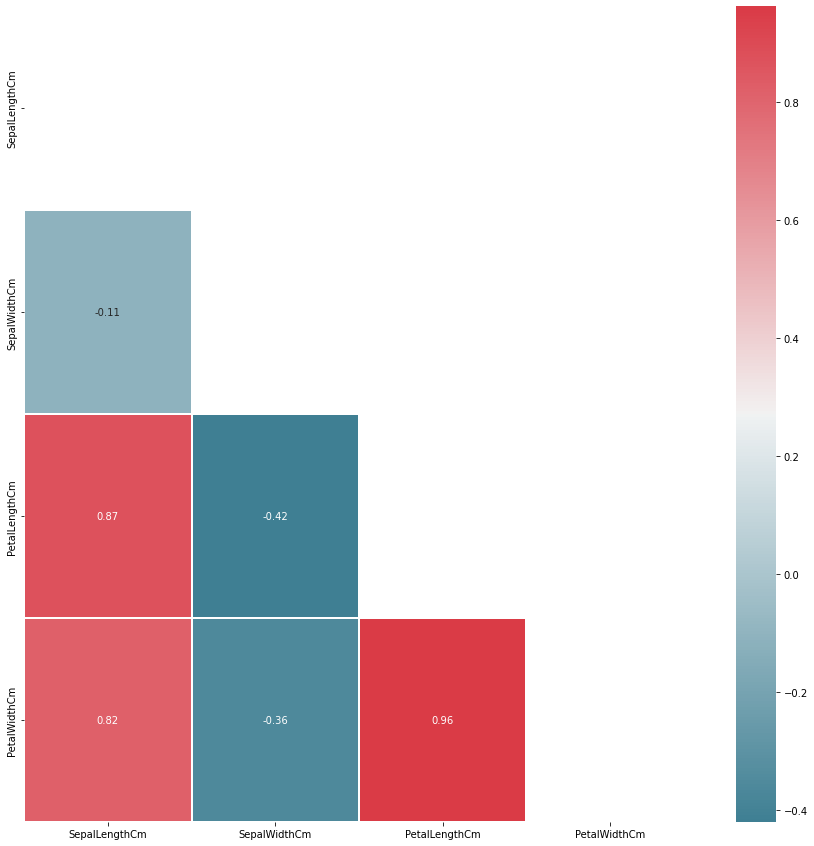

In [55]:
# apply funxciotn on iris dataset
corr_heatmap(data)

In [56]:
df = data.drop('Species', axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [67]:
# select and standardize features
X = StandardScaler().fit_transform(df.values)

# choose number of components to be generated
nr_comps = 3
pca = PCA(n_components=nr_comps)

# obtain components
principal_components = pca.fit_transform(X)

# transform the components into a pandas data frame
pca_df = pd.DataFrame(principal_components, index=df.index)

pca_df.head()

,0,1,2
Id,,,
1,-2.264542,0.505704,-0.121943
2,-2.086426,-0.655405,-0.227251
3,-2.367950,-0.318477,0.051480
4,-2.304197,-0.575368,0.098860
5,-2.388777,0.674767,0.021428


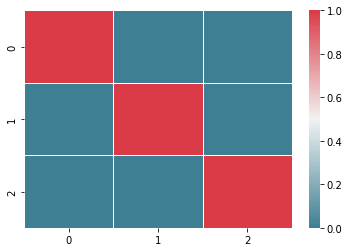

In [58]:
ax = sns.heatmap(pca_df.corr(), cmap=colormap,linewidth=1)
plt.show()

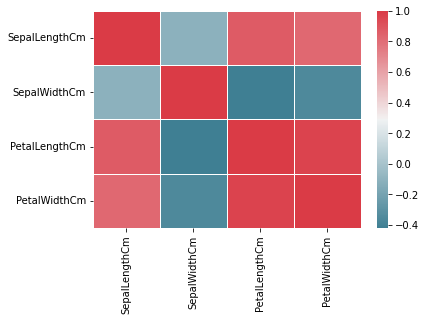

In [59]:
ax = sns.heatmap(data.corr(), cmap=colormap,linewidth=1)
plt.show()

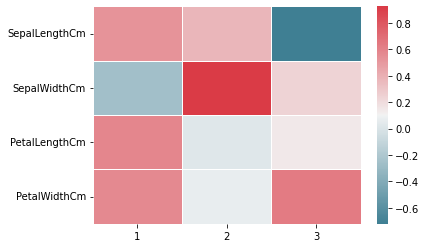

In [60]:
components = pd.DataFrame(pca.components_, columns=df.columns, index=range(1, nr_comps+1)).transpose()
ax = sns.heatmap(components,cmap=colormap,linewidth=1)
plt.show()

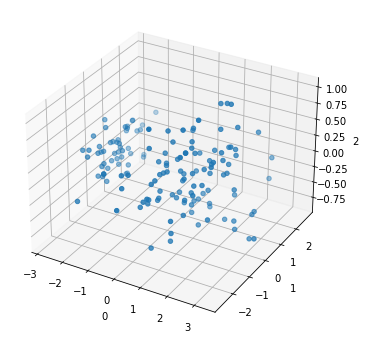

In [62]:
# 3d scatter plot of pca df
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

ax.scatter(pca_df[0], pca_df[1], pca_df[2])

ax.set_xlabel('0')
ax.set_ylabel('1')
ax.set_zlabel('2')

plt.show()

In [70]:
corr_data = data.corr()

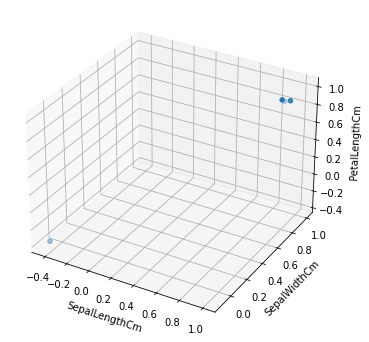

In [75]:
# 3d scatter plot of sepal length and petal length width
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

ax.scatter(corr_data['PetalLengthCm'], corr_data['SepalLengthCm'], corr_data['PetalWidthCm'])

ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('PetalLengthCm')

plt.show()

I believe it got rid off sepalwidth as this seems to have negative correlation with the other 3 while the other 3 each have a strong correlation to each other.